# Google Playstore Data
### Complete EDA Analysis For Biginners to Advance EDA

1. Importing Libraries


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Loading and Exploration/ Data Cleaning
- Let's load the CSV File


In [45]:
df=pd.read_csv("./dataset/googleplaystore.csv")

- Let's look top 05 rows of data:
  

In [46]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Set options for maximum rows & Columns

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [50]:
# How to print string with dataset code " Note that here F is used to print string in print funcation"
print(f"the number of rows are {df.shape[0]} and columns are ({df.shape[1]})")

the number of rows are 10841 and columns are (13)


In [51]:
#how to nake a size a numeric colums?
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# Size Column

---
# Observation:
1. Varies with devices
2. M
3. K
---

In [52]:
# Lets check the is there any null values in size column
df['Size'].isnull().sum()

0

##### We are good to go further as there is no null values in Size columsn

In [53]:
 # Find the values having M in the size
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()


8830

In [54]:
 # Find the values having K in the size
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()


316

In [55]:
# Find the values having veries with device in the size
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [56]:
# convert the whole size column into bytes
#lets define a funcatin to convert the size
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024
        elif 'k' in size:
            return float(size.replace('k', "")) * 1024
        elif 'Varies with device' in size:
            return np.nan
        return size

In [57]:
#Let check the size column
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [58]:

#lets apply above funcatiion
df['Size'] = df['Size'].apply(convert_size)

In [59]:
#Now check after applying the funcation
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [60]:
# rename the column----(How to rename a columns )
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [61]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
# Convert Size_in_bytes into MB


In [63]:
# We will check now Install column, values count, null values and unique values
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [64]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [65]:
df['Installs'].isnull().sum()

0

## Install Columns 
1. Remove '+' sign
2. Remove ',' sing
3. conver the columns into integer 

In [66]:
df['Installs']= df['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x)
df['Installs']= df['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x)

In [67]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [68]:
# Convert install columns dtype to integer
df['Installs'] = df['Installs'].astype(int)    #Method one without lambda funcation

#df['Installs']= df['Installs'].apply(lambda x: int(x))

In [69]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09


# Price Columns

In [71]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [72]:
df['Price'].isnull().sum()

0

### Observation
-   Remove $ Sign
-   convert columns to float

In [73]:
# Lets see how many values have dollor sign\
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum()

10841

In [74]:
df['Price']= df['Price'].apply(lambda x:x.replace('$','') if '$' in str(x) else x)

In [75]:
df['Price']= df['Price'].astype(float)

In [76]:
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [77]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


In [78]:
# using f string print min, max and average price of the app
print(f"Min price is {df['Price'].min()} and max price is {df['Price'].max()} and average price is {df['Price'].mean()}")

Min price is 0.0 and max price is 400.0 and average price is 1.0272733142699015


# Missing values inside the data

In [79]:
# find percantage of missing value in dataset and sort them
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_bytes     15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.03
Category           0.01
Type               0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Genres             0.00
Last Updated       0.00
dtype: float64

In [80]:
# find the total number of missing values in dataset
df.isnull().sum().sum()

3182

Text(0.5, 0, 'Percentage of Missing values in each Column')

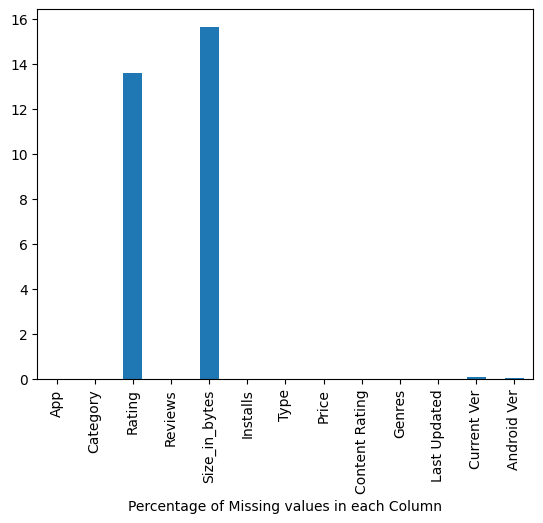

In [86]:
# creat plot for missing values
#sns.heatmap(df.isnull())
#plt.figure(figsize=(10,6))
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
 
# plot the null values by their percentage in each column
missing_values = df.isnull().sum()/len(df)*100
missing_values.plot(kind='bar')
# Now add the labels
plt.xlabel('Columns')
plt.xlabel('Percantage')
plt.xlabel('Percentage of Missing values in each Column')